In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [94]:
data = pd.read_csv('fraud.csv')
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


## Data Manipulation 

In [95]:
data['isFlaggedFraud'].unique()

array([0, 1], dtype=int64)

In [96]:
data['type'].unique()

array(['PAYMENT', 'TRANSFER', 'CASH_OUT', 'DEBIT', 'CASH_IN'],
      dtype=object)

In [97]:
print(data.head(),data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0            0.00   
4     1   PAYMENT  11668.14  C2048537720        41554.0        29885.86

In [98]:
data.shape

(6362620, 11)

In [99]:
data.isnull().any()

step              False
type              False
amount            False
nameOrig          False
oldbalanceOrg     False
newbalanceOrig    False
nameDest          False
oldbalanceDest    False
newbalanceDest    False
isFraud           False
isFlaggedFraud    False
dtype: bool

In [100]:
data.type.value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [101]:
data['nameOrig'].value_counts()

C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
              ..
C98968405      1
C720209255     1
C1567523029    1
C644777639     1
C1280323807    1
Name: nameOrig, Length: 6353307, dtype: int64

In [102]:
data['nameDest'].value_counts()

C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
              ... 
M1470027725      1
M1330329251      1
M1784358659      1
M2081431099      1
C2080388513      1
Name: nameDest, Length: 2722362, dtype: int64

In [103]:
print('Total Number of Fraudulent Transactions:',data[data['isFraud'] == 0].value_counts().sum())
print('Total Number of Non-Fraudulent Transactions:',data[data['isFraud'] == 1].value_counts().sum())

Total Number of Fraudulent Transactions: 6354407
Total Number of Non-Fraudulent Transactions: 8213


## Obtaining new balance by basic arithmetic operations

In [104]:
new_balance = data['oldbalanceOrg'] - data['amount']
print(new_balance)

0          160296.36
1           19384.72
2               0.00
3               0.00
4           29885.86
             ...    
6362615         0.00
6362616         0.00
6362617         0.00
6362618         0.00
6362619         0.00
Length: 6362620, dtype: float64


## Exploratory Data Analysis

C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

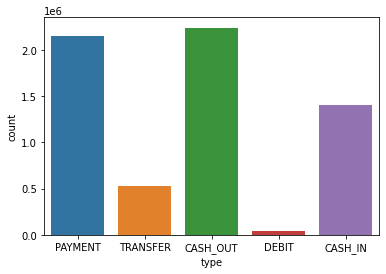

In [105]:
sns.countplot(data.type) 

C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='isFraud', ylabel='count'>

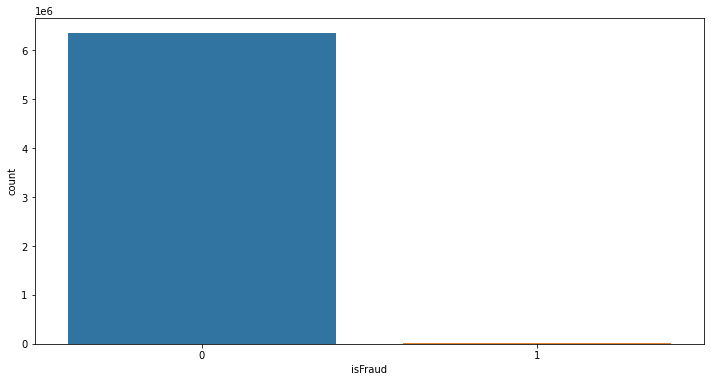

In [106]:
plt.figure(figsize=(12,6))
sns.countplot(data.isFraud) 

###  the CASH_OUT and TRANSFER are the only forms of payment in fraudulent transaction events.

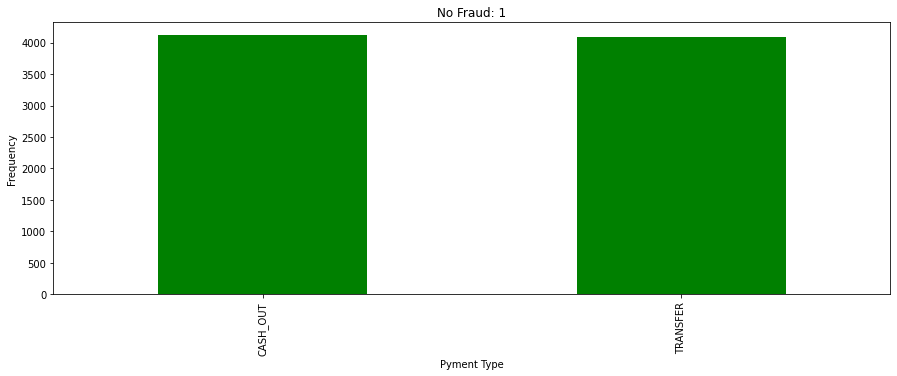

In [107]:
plt.figure(figsize=(15,5))

ex1= data['type'][data['isFraud']==1].value_counts().plot(kind='bar', color = 'g')
plt.title('No Fraud: 1')
ex1.set(xlabel = 'Pyment Type', ylabel='Frequency')

plt.show()

## Detecting Outliers

C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


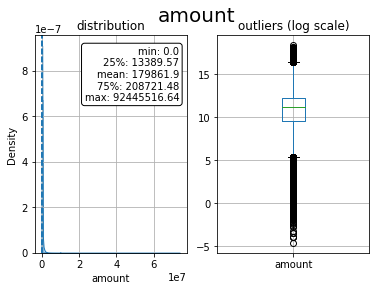

In [108]:
x = "amount"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = data[x].fillna(data[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = data[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(data[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [109]:
print(np.where(data['amount']>400000))

(array([     85,      86,      88, ..., 6362617, 6362618, 6362619],
      dtype=int64),)


In [110]:
Q1 = data.amount.quantile(0.25)
Q3 = data.amount.quantile(0.75)
Q1, Q3

(13389.57, 208721.4775)

In [111]:
IQR = Q3 - Q1
IQR

195331.9075

In [112]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-279608.29125, 501719.33875)

In [113]:
data[(data.amount<lower_limit)|(data.amount>upper_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
85,1,TRANSFER,1505626.01,C926859124,0.00,0.0,C665576141,29031.00,5515763.34,0,0
86,1,TRANSFER,554026.99,C1603696865,0.00,0.0,C766572210,579285.56,0.00,0,0
88,1,TRANSFER,761507.39,C412788346,0.00,0.0,C1590550415,1280036.23,19169204.93,0,0
89,1,TRANSFER,1429051.47,C1520267010,0.00,0.0,C1590550415,2041543.62,19169204.93,0,0
93,1,TRANSFER,583848.46,C1839168128,0.00,0.0,C1286084959,667778.00,2107778.11,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362613,743,CASH_OUT,1258818.82,C1436118706,1258818.82,0.0,C1240760502,503464.50,1762283.33,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.0,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.0,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.0,C2080388513,0.00,0.00,1,0


In [114]:
data = data[(data.amount>lower_limit)&(data.amount<upper_limit)]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0
6362611,742,CASH_OUT,63416.99,C994950684,63416.99,0.00,C1662241365,276433.18,339850.17,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <=

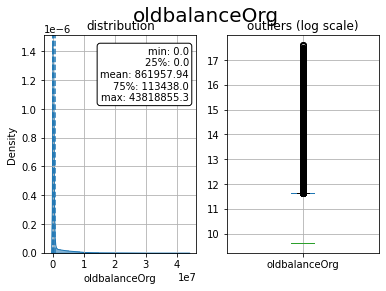

In [115]:
x = "oldbalanceOrg"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = data[x].fillna(data[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = data[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(data[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [116]:
Q1 = data.oldbalanceOrg.quantile(0.25)
Q3 = data.oldbalanceOrg.quantile(0.75)
Q1, Q3

(0.0, 113438.0)

In [117]:
IQR = Q3 - Q1
IQR

113438.0

In [118]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-170157.0, 283595.0)

In [119]:
data[(data.oldbalanceOrg<lower_limit)|(data.oldbalanceOrg>upper_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
14,1,PAYMENT,4098.78,C1026483832,503264.00,499165.22,M1635378213,0.00,0.00,0,0
37,1,PAYMENT,2791.42,C923341586,300481.00,297689.58,M107994825,0.00,0.00,0,0
38,1,PAYMENT,7413.54,C1470868839,297689.58,290276.03,M1426725223,0.00,0.00,0,0
62,1,DEBIT,8727.74,C166694583,882770.00,874042.26,C1129670968,12636.00,0.00,0,0
63,1,PAYMENT,2599.46,C885910946,874042.26,871442.79,M1860591867,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362593,741,CASH_OUT,383661.10,C369315575,383661.10,0.00,C2069429837,1788112.70,2171773.80,1,0
6362606,742,TRANSFER,303846.74,C959102961,303846.74,0.00,C114421319,0.00,0.00,1,0
6362607,742,CASH_OUT,303846.74,C1148860488,303846.74,0.00,C846260566,343660.89,647507.63,1,0
6362614,743,TRANSFER,339682.13,C2013999242,339682.13,0.00,C1850423904,0.00,0.00,1,0


In [120]:
data = data[(data.oldbalanceOrg>lower_limit)&(data.oldbalanceOrg<upper_limit)]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <=

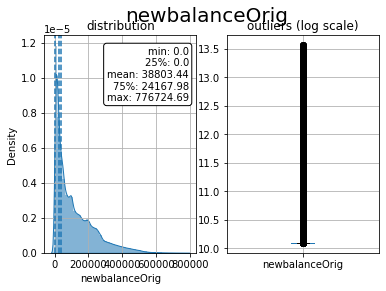

In [121]:
x = "newbalanceOrig"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = data[x].fillna(data[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = data[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(data[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [122]:
Q1 = data.newbalanceOrig.quantile(0.25)
Q3 = data.newbalanceOrig.quantile(0.75)
Q1, Q3

(0.0, 24167.975)

In [123]:
IQR = Q3 - Q1
IQR

24167.975

In [124]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-36251.962499999994, 60419.93749999999)

In [125]:
data[(data.newbalanceOrig<lower_limit)|(data.newbalanceOrig>upper_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
6,1,PAYMENT,7107.77,C154988899,183195.00,176087.23,M408069119,0.00,0.00,0,0
7,1,PAYMENT,7861.64,C1912850431,176087.23,168225.59,M633326333,0.00,0.00,0,0
23,1,PAYMENT,3876.41,C504336483,67852.00,63975.59,M1404932042,0.00,0.00,0,0
26,1,PAYMENT,9478.39,C1671590089,116494.00,107015.61,M58488213,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362282,718,DEBIT,1636.03,C761454361,83120.00,81483.97,C355970563,8393318.02,8394954.05,0,0
6362293,718,PAYMENT,12477.44,C1836315678,107092.00,94614.56,M518067452,0.00,0.00,0,0
6362298,718,CASH_IN,18000.26,C50108853,63409.00,81409.26,C204102272,28088.61,10088.34,0,0
6362302,718,PAYMENT,4630.92,C1923195044,104939.00,100308.08,M1610056657,0.00,0.00,0,0


In [126]:
data = data[(data.newbalanceOrig>lower_limit)&(data.newbalanceOrig<upper_limit)]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <=

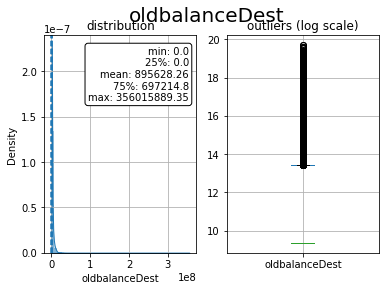

In [127]:
x = "oldbalanceDest"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = data[x].fillna(data[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = data[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(data[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [128]:
Q1 = data.oldbalanceDest.quantile(0.25)
Q3 = data.oldbalanceDest.quantile(0.75)
Q1, Q3

(0.0, 697214.7975)

In [129]:
IQR = Q3 - Q1
IQR

697214.7975

In [130]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-1045822.19625, 1743036.99375)

In [131]:
data[(data.oldbalanceDest<lower_limit)|(data.oldbalanceDest>upper_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
113,1,CASH_OUT,85423.63,C460741164,0.00,0.0,C1590550415,5776776.41,19169204.93,0,0
156,1,CASH_OUT,186447.51,C976827477,0.00,0.0,C1590550415,5862200.03,19169204.93,0,0
171,1,CASH_OUT,44443.08,C269892014,0.00,0.0,C1590550415,6048647.54,19169204.93,0,0
177,1,CASH_OUT,220691.42,C1123559518,0.00,0.0,C1590550415,6093090.62,19169204.93,0,0
557,1,CASH_OUT,227478.01,C1394010463,25743.78,0.0,C1590550415,16428780.87,19169204.93,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362515,735,CASH_OUT,243459.96,C1148037845,243459.96,0.0,C387251817,9459523.04,9702983.01,1,0
6362537,736,CASH_OUT,172915.56,C962323728,172915.56,0.0,C1193568854,7674508.70,7847424.27,1,0
6362547,737,CASH_OUT,167606.49,C696026207,167606.49,0.0,C1386785907,2315864.75,2483471.24,1,0
6362555,738,CASH_OUT,106584.32,C2085819511,106584.32,0.0,C2000713595,5524872.71,5631457.03,1,0


In [132]:
data = data[(data.oldbalanceDest>lower_limit)&(data.oldbalanceDest<upper_limit)]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\function_base.py:4009: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\matplotlib\cbook\__init__.py:1220: RuntimeWarning: invalid value encountered in less_equal
  wiskhi = x[x <=

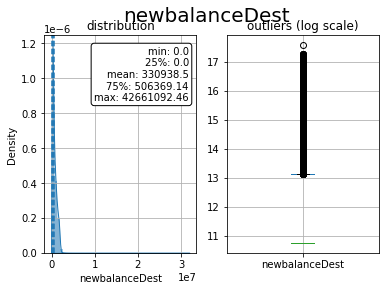

In [133]:
x = "newbalanceDest"
fig, ax = plt.subplots(nrows=1, ncols=2,  sharex=False, sharey=False)
fig.suptitle(x, fontsize=20)
### distribution
ax[0].title.set_text('distribution')
variable = data[x].fillna(data[x].mean())
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])
des = data[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)
des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"]))
ax[0].text(0.95, 0.95, box, transform=ax[0].transAxes, fontsize=10, va='top', ha="right", bbox=dict(boxstyle='round', facecolor='white', alpha=1))
### boxplot 
ax[1].title.set_text('outliers (log scale)')
tmp_dtf = pd.DataFrame(data[x])
tmp_dtf[x] = np.log(tmp_dtf[x])
tmp_dtf.boxplot(column=x, ax=ax[1])
plt.show()

In [134]:
Q1 = data.newbalanceDest.quantile(0.25)
Q3 = data.newbalanceDest.quantile(0.75)
Q1, Q3

(0.0, 506369.14)

In [135]:
IQR = Q3 - Q1
IQR

506369.14

In [136]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit, upper_limit

(-759553.71, 1265922.85)

In [137]:
data[(data.newbalanceDest<lower_limit)|(data.newbalanceDest>upper_limit)]

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
24,1,TRANSFER,311685.89,C1984094095,10835.00,0.0,C932583850,6267.00,2719172.89,0,0
48,1,CASH_OUT,5346.89,C512549200,0.00,0.0,C248609774,652637.00,6453430.91,0,0
83,1,TRANSFER,125872.53,C1443967876,0.00,0.0,C392292416,348512.00,3420103.09,0,0
84,1,TRANSFER,379856.23,C1449772539,0.00,0.0,C1590550415,900180.00,19169204.93,0,0
90,1,TRANSFER,358831.92,C908084672,0.00,0.0,C392292416,474384.53,3420103.09,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362153,718,CASH_OUT,266195.63,C148091309,268.00,0.0,C1404663446,1206948.86,1473144.49,0,0
6362155,718,CASH_OUT,152243.50,C913534366,52.00,0.0,C1622854012,1370447.35,1522690.85,0,0
6362304,718,CASH_OUT,293673.67,C1683193267,6021.00,0.0,C2073633610,1466363.66,1760037.33,0,0
6362357,722,CASH_OUT,59263.88,C1129374442,59263.88,0.0,C552296205,1597464.29,1656728.17,1,0


In [138]:
data = data[(data.newbalanceDest>lower_limit)&(data.newbalanceDest<upper_limit)]
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,PAYMENT,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,CASH_OUT,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362608,742,TRANSFER,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,CASH_OUT,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,TRANSFER,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0


## Feature Engineering

In [139]:
numerical_value = {
    'PAYMENT' : 1,
    'TRANSFER' : 2,
    'CASH_OUT' : 3,
    'DEBIT' : 4,
    'CASH_IN':5
}
final_data = data['type'].map(numerical_value)
print(final_data)

1          1
2          2
3          3
4          1
5          1
          ..
6362605    3
6362608    2
6362609    3
6362610    2
6362611    3
Name: type, Length: 3251409, dtype: int64


In [140]:
data['type'] = final_data
data

C:\Users\NIHIL RENGASAMY\AppData\Local\Temp\ipykernel_10212\1198981525.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['type'] = final_data


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,3,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1,0
6362608,742,2,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1,0
6362609,742,3,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1,0
6362610,742,2,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1,0


In [141]:
data.shape

(3251409, 11)

### Data is unbalanced here

In [142]:
print(fraud_data.shape,nonfraud_data.shape)

(3248382, 11) (3027, 11)


### Removing 'isFlaggedFraud" colum from the dataframe "data"

##### Reason: The 'isFlaggedFraud' column is derived in the 'isFraud' column

In [143]:
data = data.drop('isFlaggedFraud',axis=1)

In [144]:
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
1,1,1,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0
2,1,2,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1
3,1,3,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1
4,1,1,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0
5,1,1,7817.71,C90045638,53860.00,46042.29,M573487274,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,C43545501,54652.46,0.00,C830041824,0.00,54652.46,1
6362608,742,2,258355.42,C1226129332,258355.42,0.00,C1744173808,0.00,0.00,1
6362609,742,3,258355.42,C1113162093,258355.42,0.00,C797688696,25176.67,283532.09,1
6362610,742,2,63416.99,C778071008,63416.99,0.00,C1812552860,0.00,0.00,1


<AxesSubplot:>

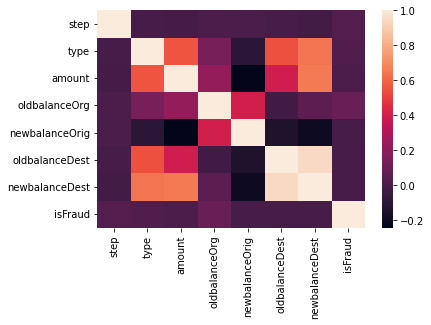

In [145]:
sns.heatmap(data.corr())

### Selecting only neccesary data

In [146]:
data = data.drop(['nameOrig','nameDest'], axis = 1)

In [147]:
data

,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
1,1,1,1864.28,21249.00,19384.72,0.00,0.00,0
2,1,2,181.00,181.00,0.00,0.00,0.00,1
3,1,3,181.00,181.00,0.00,21182.00,0.00,1
4,1,1,11668.14,41554.00,29885.86,0.00,0.00,0
5,1,1,7817.71,53860.00,46042.29,0.00,0.00,0
...,...,...,...,...,...,...,...,...
6362605,742,3,54652.46,54652.46,0.00,0.00,54652.46,1
6362608,742,2,258355.42,258355.42,0.00,0.00,0.00,1
6362609,742,3,258355.42,258355.42,0.00,25176.67,283532.09,1
6362610,742,2,63416.99,63416.99,0.00,0.00,0.00,1


In [148]:
X = data.drop(['isFraud'], axis=1)
y = data.isFraud

In [149]:
print(X)

         step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
1           1     1    1864.28       21249.00        19384.72            0.00   
2           1     2     181.00         181.00            0.00            0.00   
3           1     3     181.00         181.00            0.00        21182.00   
4           1     1   11668.14       41554.00        29885.86            0.00   
5           1     1    7817.71       53860.00        46042.29            0.00   
...       ...   ...        ...            ...             ...             ...   
6362605   742     3   54652.46       54652.46            0.00            0.00   
6362608   742     2  258355.42      258355.42            0.00            0.00   
6362609   742     3  258355.42      258355.42            0.00        25176.67   
6362610   742     2   63416.99       63416.99            0.00            0.00   
6362611   742     3   63416.99       63416.99            0.00       276433.18   

         newbalanceDest  
1

In [150]:
print(y)

1          0
2          1
3          1
4          0
5          0
          ..
6362605    1
6362608    1
6362609    1
6362610    1
6362611    1
Name: isFraud, Length: 3251409, dtype: int64


## Making Balanced Data

In [151]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.under_sampling import RandomUnderSampler 

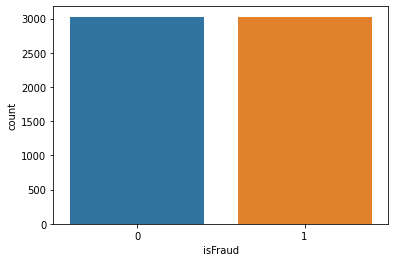

In [152]:
# We used the undersampling technique to get a reduzided sample from the major classe.

nr = NearMiss()

under_sampler = RandomUnderSampler()
X0, y0 = under_sampler.fit_resample(X, y)

np.bincount(y0)

ax = sns.countplot(x=y0)

### Feature Selection

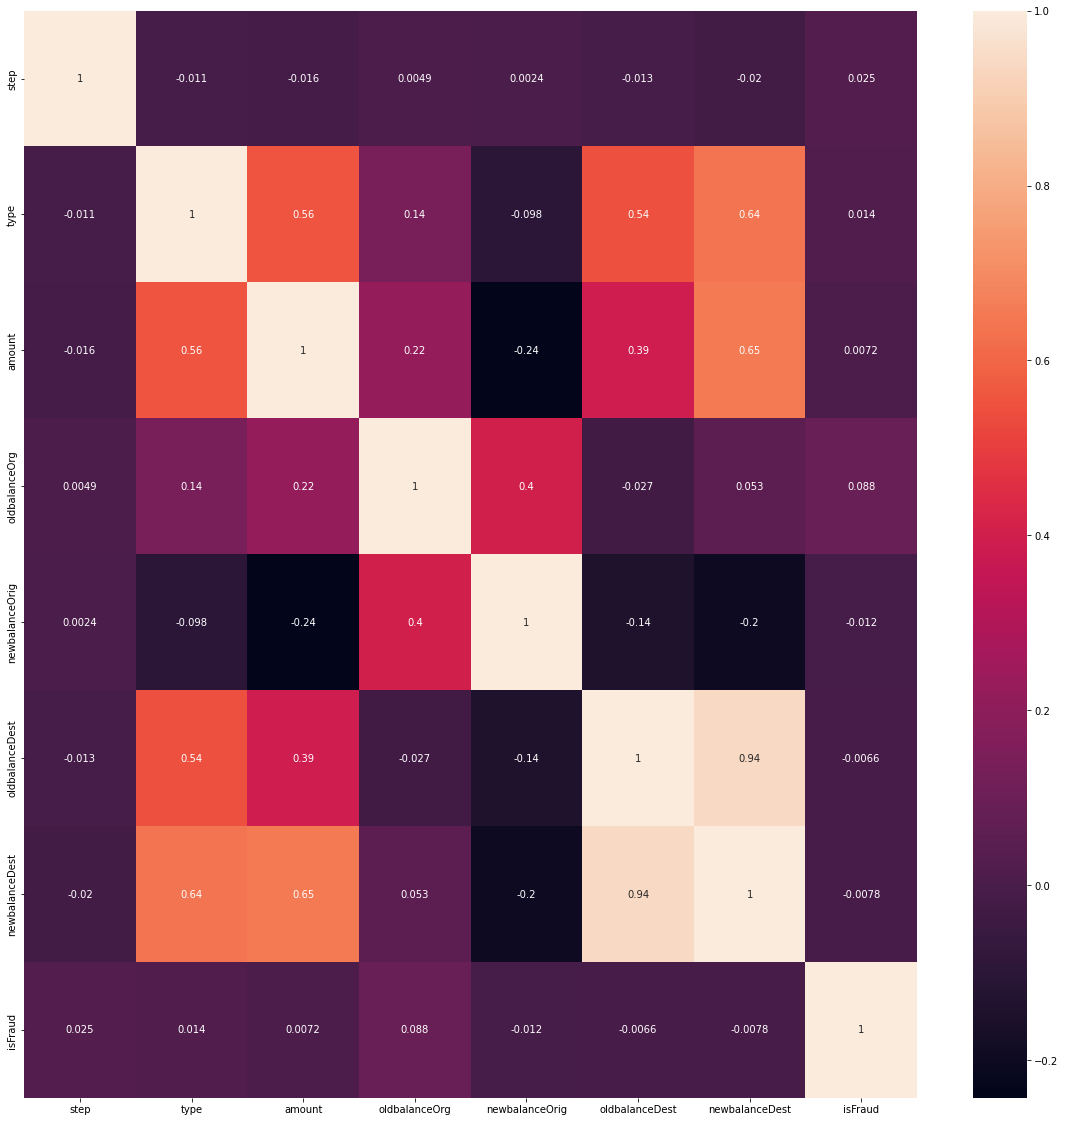

In [153]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(data.corr(), annot = True);

## Train,Test,Split 

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
X_train, X_test, y_train, y_test = train_test_split(X0, y0,train_size=0.7, random_state=1234)

In [156]:
X0.shape

(6054, 7)

In [157]:
y0.shape

(6054,)

In [158]:
X_train.shape

(4237, 7)

In [159]:
X_test.shape

(1817, 7)

In [160]:
y_train.shape

(4237,)

In [161]:
y_test.shape

(1817,)

In [162]:
from xgboost import XGBClassifier

In [163]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from xgboost import XGBClassifier

models = { 
    'Logistic_Regression' : LogisticRegression(random_state=42),
    'SVC' : SVC(kernel='rbf', gamma=0.5, probability=True),
    'DecisionTreeClassifier': DecisionTreeClassifier(max_depth=1, random_state=42),
    'GradientBoostingClassifier' : GradientBoostingClassifier(max_depth=1, n_estimators=3, learning_rate=1.0, random_state=42),
} 

In [164]:
from sklearn.metrics import precision_score, recall_score, accuracy_score 

def loss(y_true, y_pred, retur=False): 
    pre = precision_score(y_true, y_pred, average='macro')  
    rec = recall_score(y_true, y_pred, average='macro') 
    accuracy = accuracy_score(y_true, y_pred)
    
    if retur:
        return pre, rec, accuracy 
    else: 
        print(pre) 
        print(rec) 
        print(accuracy)

In [165]:
def train_and_eval(models,X0,y0): 
    for name, model in models.items(): 
        print(name ,':')  
        model.fit(X0,y0)
        loss(y0, model.predict(X0)) 
        print('*' * 30) 

In [166]:
X0.shape

(6054, 7)

### Precision Score,Recall Score and Accuracy Score

In [167]:
train_and_eval(models, X_train, y_train)

Logistic_Regression :
0.9704880204746584
0.9691775816052368
0.969317913618126
******************************
SVC :
1.0
1.0
1.0
******************************
DecisionTreeClassifier :
0.799600640225731
0.7990521595245512
0.7989143261741798
******************************
GradientBoostingClassifier :
0.8744346418638581
0.865984118134908
0.8664149162143026
******************************


###  Implementing Xgboostclassifier method

In [168]:
from category_encoders import OrdinalEncoder

In [169]:
# Encoding the categorical feature of data features
ordinal = OrdinalEncoder()
x_train0 = ordinal.fit_transform(X_train)

ordinal = OrdinalEncoder()
x_test0 = ordinal.fit_transform(X_test)

In [170]:
print(x_train0)

      step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
819    380     3  323245.59            0.0            0.00       471303.64   
140    237     3  176695.36            0.0            0.00       397825.52   
2940   308     1   13607.10          557.0            0.00            0.00   
2110   401     1    7096.61            0.0            0.00            0.00   
3001   185     3  458635.69        14380.0            0.00        36428.57   
...    ...   ...        ...            ...             ...             ...   
664    209     1    4622.24         3903.0            0.00            0.00   
3276    43     3   21987.00        21987.0            0.00       123690.93   
1318   373     3  160431.01        19469.0            0.00       576185.31   
723    382     1   13207.04        57463.9        44256.87            0.00   
2863   157     1   10276.63            0.0            0.00            0.00   

      newbalanceDest  
819        794549.23  
140        574520

In [171]:
print(x_test0)

      step  type     amount  oldbalanceOrg  newbalanceOrig  oldbalanceDest  \
786    492     3  289005.15       20908.00             0.0        87982.96   
1151   232     3   13254.36       11458.00             0.0            0.00   
909    234     3  199503.73       21465.00             0.0       155729.70   
4386   317     3    7535.58        7535.58             0.0        44609.54   
2073   250     3   93415.28       51497.00             0.0       369292.64   
...    ...   ...        ...            ...             ...             ...   
5882   703     3   13024.95       13024.95             0.0            0.00   
3539   106     2    2231.46        2231.46             0.0            0.00   
2159   283     1   10243.06           0.00             0.0            0.00   
4169   267     2   37669.14       37669.14             0.0            0.00   
5120   509     2   40836.05       40836.05             0.0            0.00   

      newbalanceDest  
786        376988.11  
1151        13254

In [172]:
# Building XGBClassifier model
xgbc = XGBClassifier()

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='multi:softprob', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_delta_step=0,
              max_depth=3, min_child_weight=1, missing=None,
              monotone_constraints=None, n_estimators=100, n_jobs=1,
              nthread=None, num_parallel_tree=None, objective='multi:softprob',
              predictor=None, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, seed=None, silent=None, subsample=1,
              tree_method=None, ...)

In [173]:
# Training the model 
xgbc.fit(x_train0, y_train)

C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


[22:01:40] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [174]:
# Creating the prediction values

ypred = xgbc.predict(x_test0)

### 3) Demonstrate the performance of the model by using best set of tools - Using accuracy score , Precision score,F1 score,Recall Score and Confusion Matrix

In [175]:
from sklearn.metrics import confusion_matrix

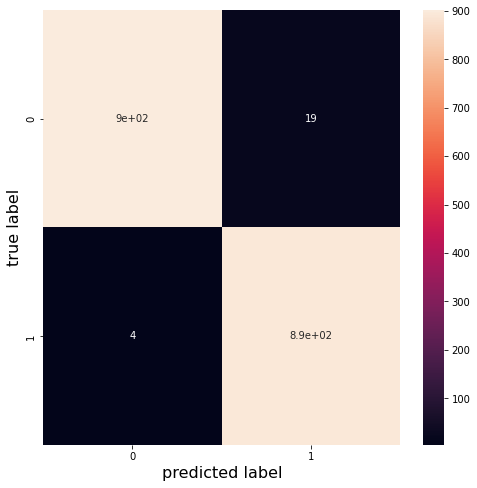

In [176]:
plt.figure(figsize = (8, 8))
ypred = (ypred > 0.5)
cm = confusion_matrix(y_test, ypred)
sns.heatmap(cm, annot=True)
plt.xlabel("predicted label", fontsize=16)
plt.ylabel("true label", fontsize=16);

In [177]:
# Evaluating the ranking model performance metric
from sklearn.metrics import classification_report

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       1.00      0.98      0.99       921
           1       0.98      1.00      0.99       896

    accuracy                           0.99      1817
   macro avg       0.99      0.99      0.99      1817
weighted avg       0.99      0.99      0.99      1817



In [178]:
## The ROC-AUC metric tells us how reliable our forecasting model is.
from sklearn.metrics import roc_auc_score

print(f"ROC-AUC score: {roc_auc_score(y_test.values, ypred)}")

ROC-AUC score: 0.9874529820071352


## Avoiding Overfitting

In [179]:
from sklearn.model_selection import KFold

[22:01:41] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       1.00      0.99      1.00       610
           1       0.99      1.00      1.00       601

    accuracy                           1.00      1211
   macro avg       1.00      1.00      1.00      1211
weighted avg       1.00      1.00      1.00      1211

ROC-AUC score: 0.9950696925888547
[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       591
           1       0.98      1.00      0.99       620

    accuracy                           0.99      1211
   macro avg       0.99      0.99      0.99      1211
weighted avg       0.99      0.99      0.99      1211

ROC-AUC score: 0.9891204082746575
[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       0.99      0.98      0.99       624
           1       0.98      0.99      0.99       587

    accuracy                           0.99      1211
   macro avg       0.99      0.99      0.99      1211
weighted avg       0.99      0.99      0.99      1211

ROC-AUC score: 0.9861761783077796
[22:01:42] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       604
           1       0.98      1.00      0.99       607

    accuracy                           0.99      1211
   macro avg       0.99      0.99      0.99      1211
weighted avg       0.99      0.99      0.99      1211

ROC-AUC score: 0.9875909641380364
[22:01:43] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


              precision    recall  f1-score   support

           0       1.00      0.98      0.99       598
           1       0.98      1.00      0.99       612

    accuracy                           0.99      1210
   macro avg       0.99      0.99      0.99      1210
weighted avg       0.99      0.99      0.99      1210

ROC-AUC score: 0.9899665551839465


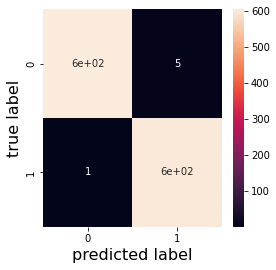

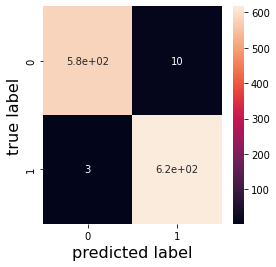

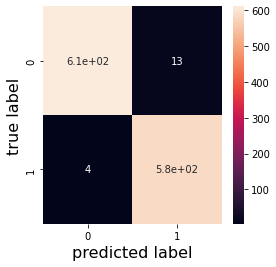

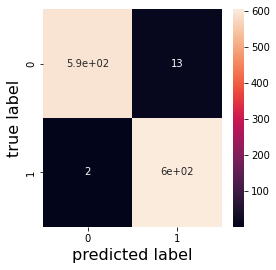

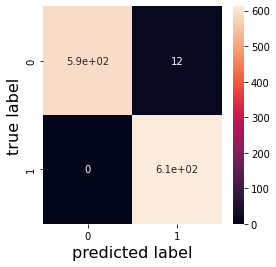

In [180]:
ordinal = OrdinalEncoder()
X0 = ordinal.fit_transform(X0)

kf = KFold(5, shuffle=True, random_state=0)

results = [] 
rocs = []
auc = []
for line_train, line_valid in kf.split(X0):
    X_train, X_valid = X0.iloc[line_train], X0.iloc[line_valid]
    y_train, y_valid = y0.iloc[line_train], y0.iloc[line_valid]

    xgbc.fit(X_train, y_train)

    ypreds = xgbc.predict(X_valid)

    plt.figure(figsize = (4, 4))
    ypreds = (ypreds > 0.5)
    cm = confusion_matrix(y_valid, ypreds)
    sns.heatmap(cm, annot=True)
    plt.xlabel("predicted label", fontsize=16)
    plt.ylabel("true label", fontsize=16);

    res = classification_report(y_valid, ypreds)
    r = roc_auc_score(y_valid.values, ypreds)
    roc = f"ROC-AUC score: {r}"
    results.append(res)
    rocs.append(roc)
    auc.append(r)
    print(res)
    print(roc)

### Coverting the y_test values from series object into array

In [181]:
a = np.array(y_test.values.tolist())
print(a)

[0 0 0 ... 0 1 1]


### Comparing the Predicted result and the Actual result

In [182]:
y_pred = xgbc.predict(x_test0)
print(np.concatenate((y_pred.reshape(len(y_pred),1), a.reshape(len(a),1)),1))


[[0 0]
 [0 0]
 [0 0]
 ...
 [0 0]
 [1 1]
 [1 1]]


C:\Users\NIHIL RENGASAMY\AppData\Local\Programs\Python\Python310\lib\site-packages\xgboost\data.py:262: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  elif isinstance(data.columns, (pd.Int64Index, pd.RangeIndex)):


In [183]:
#In the below Snippet:
#    [0,0] - the first zero refes to Fradulent transaction is predicted and it is happening(actual value)which is represented by second zero
#    [1,1] - the first one refes to Fradulent transaction is predicted as not going to happen and it is not happening(actual value)which is represented by second one

# Answers for the model

In [184]:
The answers for the Question 1 and 8 are mentioned before 

SyntaxError: invalid syntax (1044351374.py, line 1)

In [ ]:
3) How did you select variables to be included in the model.

I have selected based on the correlation between the indpendent variable and the target variable

In [ ]:
5) What are the key factors that predict fraudulent customer?

The KeyFactors that predict fraudulent customer are the amount,isFraud,oldbalanceDest,newbalanceDest

In [ ]:
6) Do these factors make sense? If yes, How? If not, How not? 

As already mentioned when the amount transfered in a single transaction is above 200 rupee,then it is illega(Fradulent customer) as per dataset, and in the case of OldbalanceDest , NewbalanceDest, the receipt before transaction should be shown as it contains 181rupees extra before transaction is happening and 181 amount should be shown as deducted in the receipt after the transaction is happened  

In [ ]:
7)What kind of prevention should be adopted while company update its infrastructure?

The Company should set single transaction limit to some particular amount, If the transaction exceeds the limit, the customer should be contacted and since the fradulent factor is most often happened due to CASH_OUT and TRANSFER type of transactions, it should be not given as an option for the customer for the transaction purpose until updation is completed, and the altenative types should be developed in a such way it satisfies every users nedd immediately   

In [ ]:
8) Assuming these actions have been implemented, how would you determine if they work?

We can determine it by using the above model as a pickle file and attach it to the Flask file and mentioning all the actions above  as constarints in the Flask framework file which is connected to the Front end design, and the sql database should be connected to Flask,which extarcts each transaction performed everyday 